c:\Users\ntino\anaconda3\envs\ee460\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\ntino\anaconda3\envs\ee460\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\ntino\anaconda3\envs\ee460\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\ntino\anaconda3\envs\ee460\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

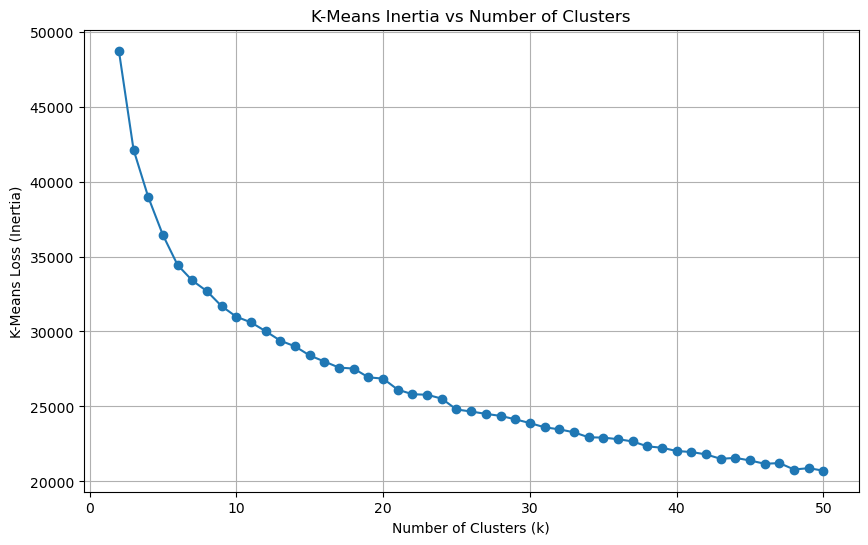

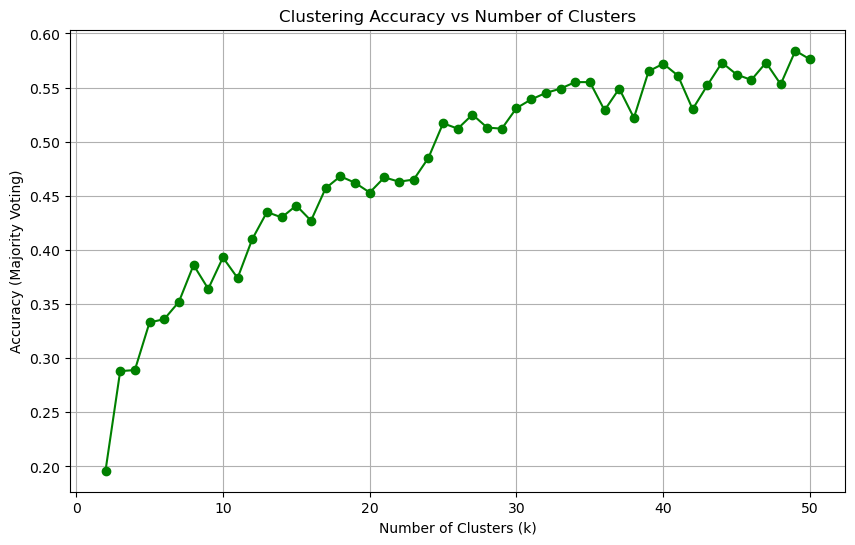

Best clustering k: 49
Highest clustering accuracy: 0.5840


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv('../gtzan/features_30_sec.csv')

# Step 2: Extract labels and features
if 'filename' in data.columns:
    data['label'] = data['filename'].str.extract(r'^([a-zA-Z]+)')
    features = data.drop(columns=['filename', 'label'])
    labels = data['label']
else:
    features = data
    labels = None

# Step 3: Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Step 5: K-Means clustering with varying k
max_k = 50
inertias = []
accuracies = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    inertias.append(kmeans.inertia_)

    # Map each cluster to true label using majority vote
    label_map = {}
    for i in range(k):
        mask = (cluster_labels == i)
        if np.any(mask):
            true_labels_in_cluster = encoded_labels[mask]
            label_map[i] = mode(true_labels_in_cluster, keepdims=False).mode
        else:
            label_map[i] = -1  # fallback if cluster is empty

    # Predict mapped labels
    predicted_labels = np.array([label_map[c] for c in cluster_labels])
    acc = accuracy_score(encoded_labels, predicted_labels)
    accuracies.append(acc)

# Step 6: Plot K-Means loss (inertia)
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('K-Means Loss (Inertia)')
plt.title('K-Means Inertia vs Number of Clusters')
plt.grid()
plt.show()

# Step 7: Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), accuracies, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy (Majority Voting)')
plt.title('Clustering Accuracy vs Number of Clusters')
plt.grid()
plt.show()

# Step 8: Print best accuracy
best_k = np.argmax(accuracies) + 2  # +2 since we started at k=2
print(f"Best clustering k: {best_k}")
print(f"Highest clustering accuracy: {accuracies[best_k - 2]:.4f}")
